# Imports

In [1]:
import importlib
import SYT
import matplotlib.pyplot as plt

importlib.reload(SYT)

<module 'SYT' from 'c:\\Users\\andre\\OneDrive\\MATH 480 Assignments\\Math-480\\6_20_2024_SYT\\SYT.py'>

## SYT Helper Functions.
Implement the functions `is_valid_SYT` and `reshape_perm` then run this cell to test your helper functions. 

In [2]:
print(SYT.is_valid_SYT(((1, 2, 3), (4, 5, 6), (7, 8, 9)))) # True
print(SYT.is_valid_SYT(((1, 2, 3), (5, 4), (6,)))) # False

print(SYT.reshape_perm((1, 2, 3, 4, 5, 6), (3, 2, 1))) # ((1, 2, 3), (4, 5), (6,))
print(SYT.reshape_perm((1, 2, 3, 4, 5, 6), (3, 3))) # ((1, 2, 3), (4, 5, 6))

True
False
((1, 2, 3), (4, 5), (6,))
((1, 2, 3), (4, 5, 6))


# Generate all SYTs
Implement `SYTs` and generate all valid SYTs for the following shapes:
- (4,3,2,1)
- (2,2)
- (3,3)
- (4,4)
- (5,5)

Save your SYTs in the `data` subfolder. For example, the SYTs of shape (4,3,2,1) are saved in `data/SYTs_4_3_2_1.txt`.

What do you notice about SYTs of shape (n,n)? Write your observation in this cell here:
The SYT's of shape (n,n) produdes the same amout of SYTs as the nth catalan number

In [3]:
# Generate SYTs
shapes = [(4,3,2,1), (2,2), (3,3), (4,4), (5,5)]
for shape in shapes:
    with open(f"data/SYTs_{'_'.join(map(str, shape))}.txt", 'w') as f:
        f.write(str(SYT.SYTs(shape))) # Write SYTs to file


KeyboardInterrupt: 

# Generating Random SYTs
Implement `random_SYT` and `random_SYT_2` and compare the efficacy on the shape (2,2,2).

Print out how long it takes to generate 10000 samples using each function and compare the distributions to the uniform distribution.

Plot the distributions using matplotlib and save them in the `figures` subfolder.

SYT time: 99.4061861038208
SYT_2 time: 96.08708310127258


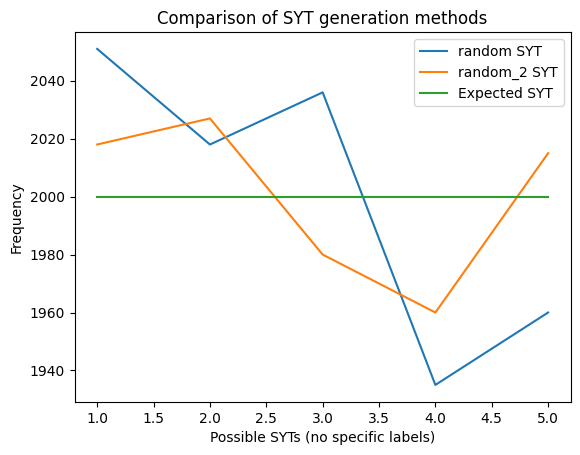

In [13]:
shape = (2,2,2)
import time
import os


distribution = {syt: 0 for syt in SYT.SYTs(shape)}


start_time_SYT = time.time()
for i in range(10000):
  distribution[SYT.random_SYT(shape)] += 1
end_time_SYT = time.time()
print(f"SYT time: {end_time_SYT - start_time_SYT}")
plt.plot(range(1,len(distribution)+1), distribution.values(), label="random SYT")

distribution = {syt: 0 for syt in SYT.SYTs(shape)}
start_time_SYT_2 = time.time()
for i in range(10000):
  distribution[SYT.random_SYT(shape)] += 1
end_time_SYT_2 = time.time()
print(f"SYT_2 time: {end_time_SYT_2 - start_time_SYT_2}")
expected_distribution = {str(syt): 10000 / len(distribution) for syt in distribution}
plt.plot(range(1,len(distribution)+1), distribution.values(), label="random_2 SYT")

plt.plot(range(1,len(distribution)+1), expected_distribution.values(), label="Expected SYT")
if not os.path.exists('figures'):
    os.makedirs('figures')
plt.xlabel("Possible SYTs (no specific labels)")
plt.ylabel("Frequency")
plt.legend()
plt.title("Comparison of SYT generation methods")
plt.savefig('figures/distributions_comparison.png')
plt.show()